# ML&Fintech HW2 Question 3

Author: Alvin B. Lin\
Date: 22/9\
HW #: 2\
ID: 112652040

## Problem 3

In this problem, you will perform K-means clustering manually, with `K` = 2, on a small example with `n` = 6 observations and `p` = 2 features. The observations are as follows.


|Obs.|$X_1$|$X_2$|
|:---:|:---:|:---:|
|$1$|$1$|$4$|
|$2$|$1$|$3$|
|$3$|$0$|$4$|
|$4$|$5$|$1$|
|$5$|$6$|$2$|
|$6$|$4$|$0$|

(a) Plot the observations.

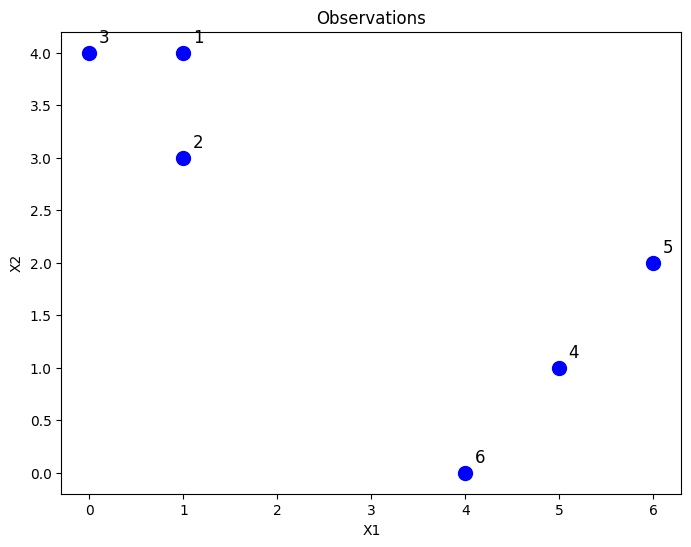

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
X1 = np.array([1.0, 1.0, 0.0, 5.0, 6.0, 4.0])
X2 = np.array([4.0, 3.0, 4.0, 1.0, 2.0, 0.0])
obs = list(zip(X1, X2))

# print(f"Observations: {obs}")

# Create the plot
ax = plt.figure(figsize=(8, 6)) # Corrected from plt.Figure
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Observations')

# Plot the points
plt.scatter(X1, X2, c='blue', s=100)

# Label each observation with its number
for i, (x, y) in enumerate(zip(X1, X2)):
    plt.text(x + 0.1, y + 0.1, f'{i+1}', fontsize=12)


---

(b) Randomly assign a cluster label to each observation. You can use the `np.random.choice()` function to do this. Report the cluster labels for each observation.

In [131]:
# The number of observations is 6
n = 6

# The number of clusters is K=2, so the labels are 1 and 2
cluster_labels = [1, 2]

# Set a random seed for reproducibility.
np.random.seed(42)

# Randomly assign a cluster label to each of the 6 observations
assigned_clusters = np.random.choice(cluster_labels, size=n)

# --- This is the new part of the code ---

# Group observations by their assigned cluster
clusters = {1: [], 2: []}
for i, cluster in enumerate(assigned_clusters):
    clusters[cluster].append(obs[i])

print("Observations grouped by initial random assignment:")
print(f"Cluster 1: {clusters[1]}")
print(f"Cluster 2: {clusters[2]}")

Observations grouped by initial random assignment:
Cluster 1: [(1.0, 4.0), (0.0, 4.0), (5.0, 1.0), (6.0, 2.0)]
Cluster 2: [(1.0, 3.0), (4.0, 0.0)]


---

(c) Compute the centroid for each cluster.

In [132]:
centroids = [None, None]
for i in cluster_labels:
    # np.mean will work correctly on the list of numpy arrays
    centroids[i - 1] = np.mean(clusters[i], axis=0)

# To see the output
print("Calculated centroids:")
print(f"Centroid 1: {centroids[0].tolist()}")
print(f"Centroid 2: {centroids[1].tolist()}")

Calculated centroids:
Centroid 1: [3.0, 2.75]
Centroid 2: [2.5, 1.5]


The random clustering's average for clusters are $(2.5,\,2.0)$ and $(3.5,\,3.0)$

---

(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.

In [147]:
new_clusters = {1: [], 2: []}
new_assigned_clusters = []

for dta in obs:
    distance = [None, None]
    for j in cluster_labels:
        distance[j-1] = np.sqrt((dta[0] - centroids[j-1][0])**2 + (dta[1] - centroids[j-1][1])**2)

    ass_cluster = np.argmin(distance)

    # Corrected line: 'dta' is a tuple, so we don't need .tolist()
    new_clusters[ass_cluster + 1].append(dta)
    new_assigned_clusters.append(ass_cluster + 1)

clusters = new_clusters.copy()
assigned_clusters = new_assigned_clusters.copy()

print("--- Iteration 1 ---")
for _ in range(len(cluster_labels)):
    print(f"Cluster {_ + 1}: {clusters[_ + 1]}")


--- Iteration 1 ---
Cluster 1: [(1.0, 4.0), (1.0, 3.0), (0.0, 4.0)]
Cluster 2: [(5.0, 1.0), (6.0, 2.0), (4.0, 0.0)]


After the rellocation, we know observation 1, 2, 3, 6 are assigned to the 1st cluster, while observation 4, 5 are assigned to the second cluster.

---

(e) Repeat (c) and (d) until the answers obtained stop changing.


In [151]:
# Assuming obs, assigned_clusters, new_assigned_clusters, centroids, and cluster_labels
# are defined from previous steps.

count = 1

obs = np.array(obs)

# Corrected loop condition for checking convergence
while not np.array_equal(assigned_clusters, new_assigned_clusters) or count < 2:
    # Update assigned_clusters with the results from the previous iteration
    if count > 1:
        assigned_clusters = new_assigned_clusters.copy()

    # Re-initialize new_clusters and new_assigned_clusters for the current iteration
    new_clusters = {1: [], 2: []}
    new_assigned_clusters = np.zeros(len(obs), dtype=int)

    print(f"--- Iteration {count + 1} ---")
    # print("Current Assignments:", assigned_clusters.tolist())

    # E-step: Re-assign observations to the nearest centroid
    for i, dta in enumerate(obs):
        distance = []
        for j in cluster_labels:
            dist = np.sqrt((dta[0] - centroids[j-1][0])**2 + (dta[1] - centroids[j-1][1])**2)
            distance.append(dist)

        ass_cluster_index = np.argmin(distance)
        ass_cluster_label = ass_cluster_index + 1
        new_assigned_clusters[i] = ass_cluster_label

    # M-step: Recalculate centroids based on new assignments
    for i in cluster_labels:
        cluster_obs = obs[new_assigned_clusters == i]
        if len(cluster_obs) > 0:
            centroids[i-1] = np.mean(cluster_obs, axis=0)
    
    # After recalculating centroids, group points for the next loop's output
    for i, label in enumerate(new_assigned_clusters):
        new_clusters[label].append(obs[i].tolist())

    if isinstance(centroids, np.ndarray):
        centroids = centroids.tolist()

    # print("New Centroids:", centroid)
    for _ in range(len(cluster_labels)):
        print(f"Cluster {_ + 1}: {new_clusters[_ + 1]}")

    count += 1
    
# The loop exits when assigned_clusters and new_assigned_clusters are equal,
# but the final values are in new_assigned_clusters and new_clusters.
print(f"\nAfter {count} iterations, the clustering process converges.")
for _ in range(len(cluster_labels)):
    print(f"Cluster {_ + 1}: {new_clusters[_ + 1]}")
print("Final assignments:", new_assigned_clusters.tolist())

--- Iteration 2 ---
Cluster 1: [[1.0, 4.0], [1.0, 3.0], [0.0, 4.0]]
Cluster 2: [[5.0, 1.0], [6.0, 2.0], [4.0, 0.0]]

After 2 iterations, the clustering process converges.
Cluster 1: [[1.0, 4.0], [1.0, 3.0], [0.0, 4.0]]
Cluster 2: [[5.0, 1.0], [6.0, 2.0], [4.0, 0.0]]
Final assignments: [1, 1, 1, 2, 2, 2]


---

(f) In your plot from (a), colour the observations according to the cluster labels obtained.

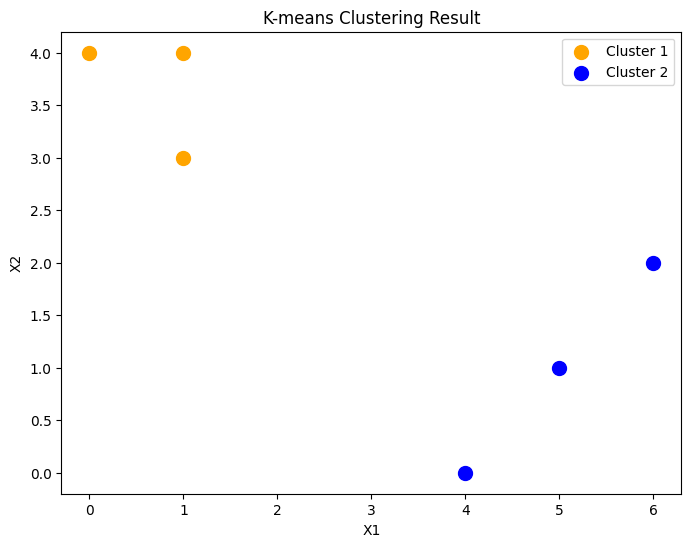

In [160]:
x_cluster1, y_cluster1= zip(*new_clusters[1])
x_cluster2, y_cluster2= zip(*new_clusters[2])

ax = plt.figure(figsize=(8, 6))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering Result')   
plt.scatter(x_cluster1, y_cluster1, c='orange', label='Cluster 1', s=100)
plt.scatter(x_cluster2, y_cluster2, c='blue', label='Cluster 2', s=100)
plt.legend()

We can now visualise the converging result, which is the same as we expect. The algorithm successfully separate the data set into two separate, appropriate clusters.